In [29]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
df=pd.read_csv("Corpus_to_test.csv",encoding='latin-1')
df.head()

,S.No,Question,Category,Answers
0,1,I am unable to connect to admission department.,Admission,You can write to admissions@reva.edu.in. One o...
1,2,What are the UG courses offered?,Admission,"Computer Applications, Arts and Humanity, Law..."
2,3,What are the Computer Applications courses off...,Admission,Bachelor of Computer Applications (BCA)
3,4,What are the Arts and Humanity courses offered...,Admission,"1.\tBA in Political Science, Economics and Jou..."
4,5,What are the Law courses offered in UG,Admission,1.\tBachelor of Arts and Bachelor of Laws (B.A...


In [31]:
df.isnull().sum()

S.No        0
Question    0
Category    0
Answers     0
dtype: int64

In [32]:
df = df.dropna(how='any',axis=0) 

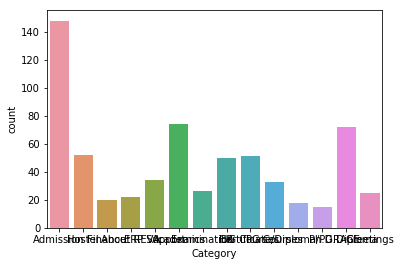

In [33]:
sns.countplot(x='Category', data=df)

In [34]:
##### List of Questions to list of words for better visualization
word_list=[]
list_question=list(df["Question"])
for sentence in list_question:
    words_sentence=sentence.split()
    for words in words_sentence:
        word_list.append(words)


word_list=[word for sentence in list(df["Question"]) for word in sentence.split()]
print(word_list)

['I', 'am', 'unable', 'to', 'connect', 'to', 'admission', 'department.', 'What', 'are', 'the', 'UG', 'courses', 'offered?', 'What', 'are', 'the', 'Computer', 'Applications', 'courses', 'offered', 'in', 'UG?', 'What', 'are', 'the', 'Arts', 'and', 'Humanity', 'courses', 'offered', 'in', 'UG', 'What', 'are', 'the', 'Law', 'courses', 'offered', 'in', 'UG', 'What', 'are', 'the', 'Architecture', 'courses', 'offered', 'in', 'UG', 'What', 'are', 'the', 'Certification', 'program', 'offered', 'in', 'UG', 'What', 'are', 'the', 'Management', '(BBA)', 'courses', 'offered', 'in', 'UG', 'What', 'are', 'the', 'PG', 'courses', 'offered?', 'What', 'are', 'the', 'Mtech', 'courses', 'offered?', 'What', 'are', 'the', 'MA', 'courses', 'offered?', 'What', 'are', 'the', 'MSc', 'courses', 'offered?', 'What', 'are', 'the', 'MPlan', 'courses', 'offered?', 'What', 'are', 'the', 'MCom', 'courses', 'offered?', 'What', 'are', 'the', 'MPA', 'courses', 'offered?', 'What', 'are', 'the', 'MCA', 'courses', 'offered?', 'W

In [35]:
from collections import Counter
#####  frequency of each word and the most common words in the dataset
frequency=Counter(word_list)
print (frequency)
print (frequency.most_common(5))

Counter({'the': 251, 'you': 166, 'Do': 162, 'What': 143, 'offer': 123, 'is': 117, 'for': 110, 'I': 109, 'in': 99, 'to': 96, 'are': 72, 'How': 71, 'IN': 66, 'of': 62, 'REVA': 62, 'a': 55, 'Is': 52, 'have': 49, 'AND': 40, '-': 40, 'and': 39, 'do': 39, 'my': 37, 'any': 36, 'can': 34, 'there': 27, 'University?': 26, 'courses': 23, 'Can': 23, 'get': 21, 'not': 21, 'program?': 20, 'if': 20, 'at': 19, 'University': 19, 'campus?': 19, 'When': 19, 'many': 19, 'Does': 18, 'ENGINEERING?': 17, 'apply': 16, 'pay': 16, 'program': 15, 'be': 15, 'application': 15, 'programs?': 15, 'PH.D': 15, 'offered?': 14, 'offered': 14, 'fees': 14, 'from': 14, 'or': 14, 'B.TECH.': 14, 'COMPUTER': 14, 'programs': 13, 'it': 13, 'student': 13, 'hostel': 13, 'am': 12, 'Are': 12, 'Why': 12, 'HONS': 12, 'B.SC.': 12, 'M.TECH.': 12, 'DIPLOMA': 12, 'students': 11, 'on': 11, 'REVA?': 11, 'will': 11, 'admission?': 11, 'we': 11, 'M.': 11, 'university': 10, 'book': 10, 'ERP': 10, 'academic': 9, 'fee': 9, 'how': 9, 'Whom': 9, 'M

In [36]:
### Remove Punctuations and change all words to lower case
import re
def remove_punctuations(text):    
    words=[word.lower() for word in text.split()] 
    words=[w for word in words for w in re.sub(r'[^\w\s]','',word).split()]    
    return words

df["que_no_punct"]=df["Question"].apply(remove_punctuations)
print (df["que_no_punct"])

0      [i, am, unable, to, connect, to, admission, de...
1                 [what, are, the, ug, courses, offered]
2      [what, are, the, computer, applications, cours...
3      [what, are, the, arts, and, humanity, courses,...
4        [what, are, the, law, courses, offered, in, ug]
5      [what, are, the, architecture, courses, offere...
6      [what, are, the, certification, program, offer...
7      [what, are, the, management, bba, courses, off...
8                 [what, are, the, pg, courses, offered]
9              [what, are, the, mtech, courses, offered]
10                [what, are, the, ma, courses, offered]
11               [what, are, the, msc, courses, offered]
12             [what, are, the, mplan, courses, offered]
13              [what, are, the, mcom, courses, offered]
14               [what, are, the, mpa, courses, offered]
15               [what, are, the, mca, courses, offered]
16               [what, are, the, llm, courses, offered]
17               [what, are, th

In [37]:
def negative_words(words):
    counter=False    
    wordlist=[]    
    negatives=["no","not","cant","cannot","never","less","without","barely","hardly","rarely","no","not","noway","didnt"]
    #for words in wordlist:       
    for i,j in enumerate(words):                           
            if j in negatives and i<len(words)-1:             
                wordlist.append(str(words[i]+'-'+words[i+1]))
                counter=True
            else:
                if counter is False:                
                    wordlist.append(words[i])
                else:
                    counter=False
    return wordlist

df["question_negative"]=df["que_no_punct"].apply(negative_words)
print (df["question_negative"])

0      [i, am, unable, to, connect, to, admission, de...
1                 [what, are, the, ug, courses, offered]
2      [what, are, the, computer, applications, cours...
3      [what, are, the, arts, and, humanity, courses,...
4        [what, are, the, law, courses, offered, in, ug]
5      [what, are, the, architecture, courses, offere...
6      [what, are, the, certification, program, offer...
7      [what, are, the, management, bba, courses, off...
8                 [what, are, the, pg, courses, offered]
9              [what, are, the, mtech, courses, offered]
10                [what, are, the, ma, courses, offered]
11               [what, are, the, msc, courses, offered]
12             [what, are, the, mplan, courses, offered]
13              [what, are, the, mcom, courses, offered]
14               [what, are, the, mpa, courses, offered]
15               [what, are, the, mca, courses, offered]
16               [what, are, the, llm, courses, offered]
17               [what, are, th

In [38]:
### Recreate the sentence
def Recreate(text):
    word=" ".join(text)
    return word

df["modified_questions"]=df["question_negative"].apply(Recreate)
print (df["modified_questions"])

0         i am unable to connect to admission department
1                        what are the ug courses offered
2      what are the computer applications courses off...
3      what are the arts and humanity courses offered...
4                 what are the law courses offered in ug
5        what are the architecture courses offered in ug
6       what are the certification program offered in ug
7      what are the management bba courses offered in ug
8                        what are the pg courses offered
9                     what are the mtech courses offered
10                       what are the ma courses offered
11                      what are the msc courses offered
12                    what are the mplan courses offered
13                     what are the mcom courses offered
14                      what are the mpa courses offered
15                      what are the mca courses offered
16                      what are the llm courses offered
17                      what ar

In [39]:
### Let's change the sentence into a bag of word model
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df["modified_questions"]).toarray()
print(X)
print(vectorizer.get_feature_names())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]]
['100', '16', '404', 'abled', 'about', 'abroad', 'academic', 'accepting', 'access', 'accommodation', 'account', 'accounting', 'accreditations', 'accredited', 'action', 'activities', 'administration', 'admission', 'admissions', 'affiliated', 'after', 'against', 'ai', 'aicte', 'aided', 'airconditioned', 'airport', 'all', 'allow', 'allowed', 'along', 'alumni', 'alumnus', 'am', 'amount', 'an', 'analytics', 'and', 'android', 'animation', 'announced', 'another', 'answer', 'antiragging', 'any', 'app', 'applicant', 'application', 'applications', 'applied', 'apply', 'applying', 'approach', 'approval', 'approved', 'architecture', 'are', 'around', 'arranged', 'arrangement', 'arrangements', 'artificial', 'arts', 'as', 'assessment', 'assigned', 'assignment', 'assignments', 'assistance', 'assisted', 'at', 'atithi', 'attend', 'attendance', 'attending', 'audio', 'automation', 'autono

In [40]:
def Cleaning_questions(text):
    No_text_punctuation=remove_punctuations(text)
    No_Negative_words=negative_words(No_text_punctuation)
    #text_stem=Stem(No_Negative_words)
    final_questions=Recreate(No_Negative_words)
    return final_questions
df["modified_Questions"]=df["Question"].apply(Cleaning_questions)
print (df["modified_Questions"])

0                 i am unabl to connect to admiss depart
1                            what are the ug cours offer
2           what are the comput applic cours offer in ug
3           what are the art and human cours offer in ug
4                     what are the law cours offer in ug
5             what are the architectur cours offer in ug
6                what are the certif program offer in ug
7               what are the manag bba cours offer in ug
8                            what are the pg cours offer
9                         what are the mtech cours offer
10                           what are the ma cours offer
11                          what are the msc cours offer
12                        what are the mplan cours offer
13                         what are the mcom cours offer
14                          what are the mpa cours offer
15                          what are the mca cours offer
16                          what are the llm cours offer
17                          wha

In [41]:
questions=df['modified_Questions'].values.tolist()


In [42]:
labels=df['S.No'].values.tolist()

In [43]:
answers=df['Answers'].values.tolist()

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 640 entries, 0 to 639
Data columns (total 8 columns):
S.No                  640 non-null int64
Question              640 non-null object
Category              640 non-null object
Answers               640 non-null object
que_no_punct          640 non-null object
question_negative     640 non-null object
modified_questions    640 non-null object
modified_Questions    640 non-null object
dtypes: int64(1), object(7)
memory usage: 65.0+ KB


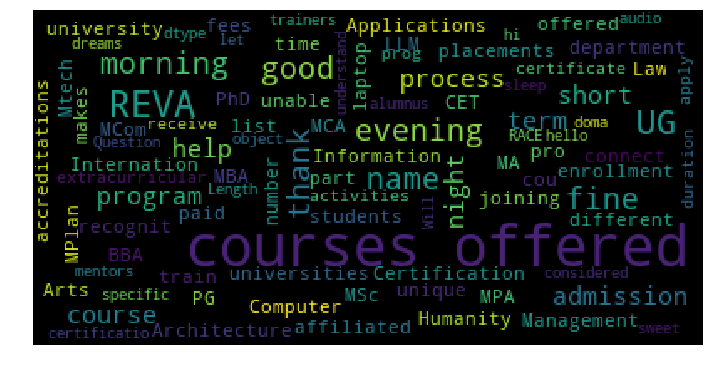

In [45]:
##### Now let's create a wordcloud to get a better understanding of our corpus
import matplotlib.pyplot as plt
from wordcloud import WordCloud
##### Download using conda install -c conda-forge wordcloud

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(background_color='black',).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()
    
show_wordcloud(df['Question'])

In [19]:
bow_vectorizer = CountVectorizer()

In [20]:
training_vectors = bow_vectorizer.fit_transform(questions)

In [21]:
classifier = MultinomialNB()
classifier.fit(training_vectors, labels)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [22]:
y_pred=classifier.predict(training_vectors)

In [23]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [24]:
accuracy_score(labels,y_pred)

0.9546875

In [25]:
print(classification_report(labels,y_pred))

             precision    recall  f1-score   support

          1       1.00      1.00      1.00         1
          2       1.00      1.00      1.00         1
          3       1.00      1.00      1.00         1
          4       1.00      1.00      1.00         1
          5       1.00      1.00      1.00         1
          6       1.00      1.00      1.00         1
          7       1.00      1.00      1.00         1
          8       1.00      1.00      1.00         1
          9       1.00      1.00      1.00         1
         10       1.00      1.00      1.00         1
         11       1.00      1.00      1.00         1
         12       1.00      1.00      1.00         1
         13       1.00      1.00      1.00         1
         14       1.00      1.00      1.00         1
         15       1.00      1.00      1.00         1
         16       1.00      1.00      1.00         1
         17       1.00      1.00      1.00         1
         18       1.00      1.00      1.00   

C:\Users\vinayajx\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [26]:
confusion_matrix(labels,y_pred)

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

In [27]:
class ChatBot:
    exit_commands = ("quit", "pause", "exit", "goodbye", "bye", "later", "stop")
    def start_chat(self):
        user_response = input("Hi, I'm a bot,How can i help you?\n")
        self.chat(Cleaning_questions(user_response))
  
    def chat(self, reply):
        while not self.make_exit(reply):
            reply = input(self.generate_response(reply)+"\n")
        return
  
    def generate_response(self, ans):
        input_vector = bow_vectorizer.transform([ans])
        predict = classifier.predict(input_vector)
        index = int(predict[0])
        #print("Accurate:",str(classifier.predict_proba(input_vector)[0][index-1] * 1000)[:5] + "%")
        return answers[index-1]
        print()
    def make_exit(self, reply):
        for exit_command in self.exit_commands:
            if exit_command in reply:
                print("Ok, have a great day!")
                return True
        return False

In [28]:
etcetera = ChatBot()
etcetera.start_chat()

Hi, I'm a bot,How can i help you?
hi
Hi there
how are you
Good, tell me..
tell me about reva university
REVA Institute of Technology & Management (RITM) was affiliated to Visvesvaraya Technological University, now it is merged to REVA University. Both the institutions are the same. The closure of institute RITM with effect from the academic year 2016-17. 
Reva University is an autonomous college with its own syllabus and exam patterns. Reva Institute of Technology is an affiliated college to Visvesvaraya Technological University, which means the syllabus and exam pattern will be based on VTU guidelines.
bye
Ok, have a great day!


In [45]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()
classifier.fit(training_vectors, labels)

DecisionTreeClassifier()

In [46]:
y_pred=classifier.predict(training_vectors)

In [47]:
accuracy_score(labels,y_pred)

0.9608763693270735

In [48]:
confusion_matrix(labels,y_pred)

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

In [46]:
etcetera = ChatBot()
etcetera.start_chat()

Hi, I'm a bot,How can i help you?
hi
Checkhttps://ruerp.reva.edu.in/website to view the fees due.
Cost of the guest house for parents?
Checkhttps://ruerp.reva.edu.in/website to view the fees due.
What is the usual academic year?
BTech  August
MTech  Last week of August
Non-engineering  June
Is REVA University a private or deemed University?
REVA CET is the Common Entrance Test conducted by REVA University for admission into its various programs. REVA CET forms the basis of eligibility for some of the programmes offered by REVA University along with scholarship. Visit website https://www.revacet.com/
What do I do if I am sick?
Your warden should give written permission to your friend and your friend will carry your mobile or smart card to scan the QR code and pick up the meals.
bye
Ok, have a great day!


In [49]:
#SVM
from sklearn.svm import SVC  
classifier = SVC(kernel='linear',probability=True) 
  
# fitting x samples and y classes 
classifier.fit(training_vectors, labels) 

SVC(kernel='linear', probability=True)

In [50]:
y_pred=classifier.predict(training_vectors)

In [51]:
confusion_matrix(labels,y_pred)

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

In [52]:
accuracy_score(labels,y_pred)

0.9608763693270735

In [48]:
etcetera = ChatBot()
etcetera.start_chat()

Hi, I'm a bot,How can i help you?
hi
Hi there
Do you have NCC and NSS?
Yes, REVA University have both NSS and NCC. Regular activities like drill, refile drill, map reading, weapon training, field craft and battle craft to name a few are being imparted to the cadets as per the syllabus framed by NCC directorate, Bengaluru for NCC. NSS is associated with creating awareness program on various topics like global warming, sanitation and ODF, swachh bharat etc. Also, NSS and NCC offered as open elective to all the programs 
Do you have health center?
Yes, well-equipped Health care Centre headed by a full time Resident Doctor and supported by paramedical staff is located on the campus.
What are the application timeline for the admission?
The application have varied timelines. For details www.reva.edu.in 
Is NATA compulsory for architecture students?
Yes, NATA is compulsory for architecture students.
quit
Ok, have a great day!


In [53]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(training_vectors, labels)

KNeighborsClassifier(n_neighbors=7)

In [54]:
y_pred=classifier.predict(training_vectors)

In [55]:
accuracy_score(labels,y_pred)

0.09859154929577464

In [56]:
confusion_matrix(labels,y_pred)

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [50]:
etcetera = ChatBot()
etcetera.start_chat()

Hi, I'm a bot,How can i help you?
hi
Check the academic calendar
How many days of Maternity leave/Matrimonial as per the leave policy.
45+ acres of lush green campus.
What do we do if we miss swipe?
Your warden should give written permission to your friend and your friend will carry your mobile or smart card to scan the QR code and pick up the meals.
Do you offer B.SC. IN NUTRITION AND DIETETICS?
Yes, we offer M.SC. IN PHYSICS
What are the prerequisites to join corporate programs?
LLM in Business and Corporate Law   (1 Year)
LLM in Criminal Law
bye
Ok, have a great day!


In [57]:
#Logistic Regression
from sklearn import linear_model
classifier = linear_model.LogisticRegression()
classifier.fit(training_vectors, labels)

LogisticRegression()

In [58]:
confusion_matrix(labels,y_pred)

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [59]:
accuracy_score(labels,y_pred)

0.09859154929577464

In [23]:
etcetera = ChatBot()
etcetera.start_chat()

Hi, I'm a bot,How can i help you?
hi
Hi there
Does REVA University have its own syllabus?
Yes, REVA University has its own syllabus.
Events hosted at REVA university
Now, just imagine that as a student, you will be exposed to a variety of student clubs and committees for extra-curricular, industrial trips and internships, Snacks at the food court, sports & gym facilities, cultural fest (REVOTHSAVA) and allied events (Smart India Hackathon), organized outings, weekend movies and much more. Here is the dream life you have been waiting for.
When can an application get rejected and will I get a refund?
Incorrectly filled, incomplete and unsigned applications are rejected.
Application once rejected will not be reconsidered and application cost will not be refunded.
Does REVA have a hostel?
Yes
bye
Ok, have a great day!


In [24]:
import joblib

In [25]:
joblib.dump(bow_vectorizer,"bow_vectorizer.joblib")
joblib.dump(classifier,"model_MNB.joblib")

['model_LR.joblib']

In [32]:
import pyttsx3
import speech_recognition as sr

In [ ]:
import speech_recognition
 
# The Recognizer is initialized.
UserVoiceRecognizer = speech_recognition.Recognizer()
 
while(1):
    try:
 
        with speech_recognition.Microphone() as UserVoiceInputSource:
 
            UserVoiceRecognizer.adjust_for_ambient_noise(UserVoiceInputSource, duration=0.5)
 
            # The Program listens to the user voice input.
            UserVoiceInput = UserVoiceRecognizer.listen(UserVoiceInputSource)
 
            UserVoiceInput_converted_to_Text = UserVoiceRecognizer.recognize_google(UserVoiceInput)
            UserVoiceInput_converted_to_Text = UserVoiceInput_converted_to_Text.lower()
            print(UserVoiceInput_converted_to_Text)
    
    except KeyboardInterrupt:
        print('A KeyboardInterrupt encountered; Terminating the Program !!!')
        exit(0)
    
    except speech_recognition.UnknownValueError:
        print("No User Voice detected OR unintelligible noises detected OR the recognized audio cannot be matched to text !!!")


hello
do engineering if i have not taken mathematics in puc
unable to connect admission department i am unable to connect to admission department want are the computer application courses offered in ug
what are the law courses offered in ug
what are the mtech courses offered what are the courses offered in ug
what are the mtech courses offered
A KeyboardInterrupt encountered; Terminating the Program !!!
A KeyboardInterrupt encountered; Terminating the Program !!!
A KeyboardInterrupt encountered; Terminating the Program !!!
No User Voice detected OR unintelligible noises detected OR the recognized audio cannot be matched to text !!!
No User Voice detected OR unintelligible noises detected OR the recognized audio cannot be matched to text !!!


In [1]:
import speech_recognition as sr
r = sr.Recognizer()
with sr.Microphone() as source:
    print("recording started...")
    audio = r.listen(source,phrase_time_limit=10)
    print("finished recording")

recording started...
finished recording


In [ ]:
try:
    print("You said " + r.recognize_google(audio))  
except LookupError:                          
    print("Could not understand audio")